# Extract Features using TSFEL
For more information on TSFEL visit https://tsfel.readthedocs.io/en/latest/
Reach out to Cole (cole.hagen0001@temple.edu) with any questions on this notebook 

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import tsfel
import ipywidgets as widgets
import io
import numpy as np

## Enter Filepath

In [4]:
#Enter the file path below use forward slashes and full path
filepath = "ENTER FILE PATH"

C:/Users/chags/OneDrive/Documents/DoD/RawData/PIL01_CUET1_02082022_a2.csv


# Uploading and Manipulating Signal Data

In [5]:
df = pd.read_csv(filepath)
x1 = df[["Accelerometer X", "Accelerometer Y", "Accelerometer Z", "Gyroscope X", "Gyroscope Y", "Gyroscope Z", "class"]] #selecting columns to extract features #only acc here

x1

<ipython-input-5-42e7ef94b525>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1["anglex"] = (np.arctan2(df["Accelerometer Y"],df["Accelerometer Z"]))
<ipython-input-5-42e7ef94b525>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1["anglex"] = np.rad2deg(x1["anglex"])
<ipython-input-5-42e7ef94b525>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,Accelerometer X,Accelerometer Y,Accelerometer Z,Gyroscope X,Gyroscope Y,Gyroscope Z,class,anglex,angley,anglez
0,-0.002930,0.010254,1.007324,0.061035,-0.549316,1.403809,0,0.000000,0.000000,0.000000
1,-0.002930,0.012207,1.007324,0.000000,-0.488281,1.403809,0,0.111071,0.000000,-0.107448
2,-0.001465,0.014160,1.005371,0.000000,-0.549316,1.464844,0,0.112630,-0.083166,-0.097219
3,-0.001953,0.015137,1.005859,0.061035,-0.549316,1.403809,0,0.055249,0.027757,-0.058087
4,-0.002930,0.018555,1.010742,0.061035,-0.671387,1.403809,0,0.189537,0.054845,-0.195420
...,...,...,...,...,...,...,...,...,...,...
164095,-0.059570,-1.010254,-0.121094,-0.915527,-4.211426,1.770020,0,-4.942459,18.387984,-4.931721
164096,-0.024414,-1.006836,-0.073730,0.122070,-5.371094,0.427246,0,2.646883,7.872938,2.636369
164097,-0.008301,-1.028809,-0.009766,0.915527,-3.234863,-0.427246,0,3.644394,-22.043090,3.643186
164098,-0.010742,-1.011719,-0.070801,-0.549316,-4.821778,0.305176,0,-3.459218,31.737017,-3.459011


## Visualize Data

C:\Users\chags\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\chags\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

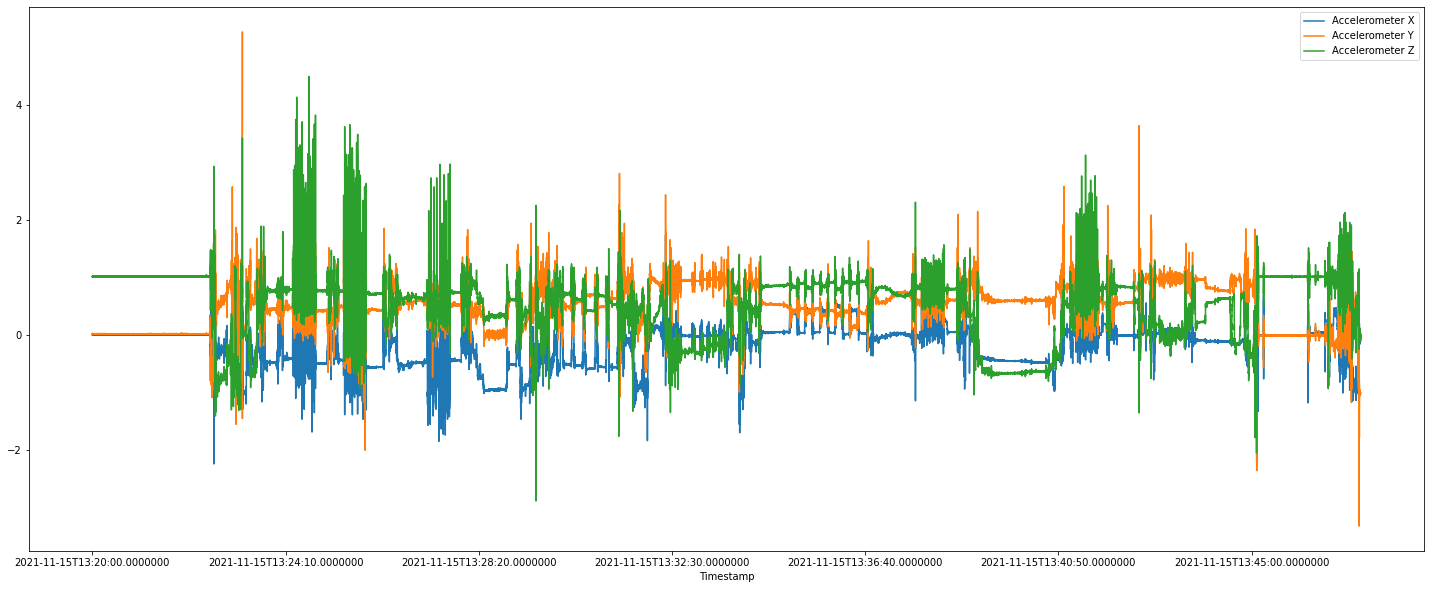

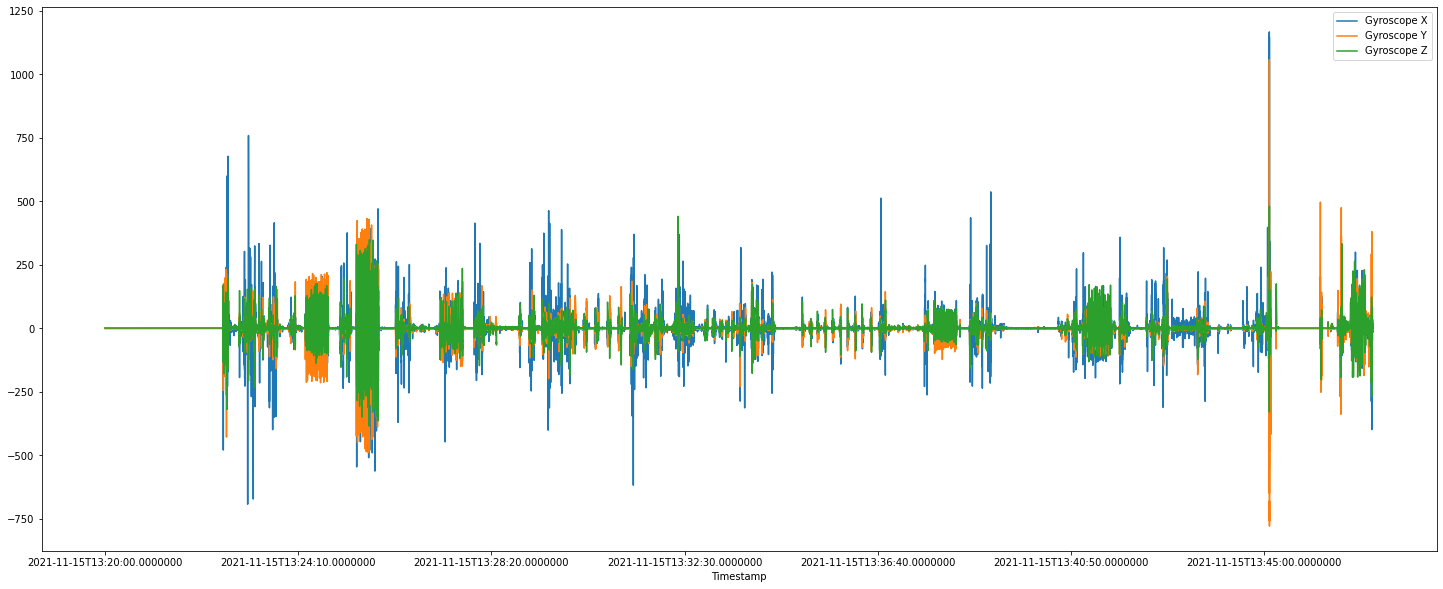

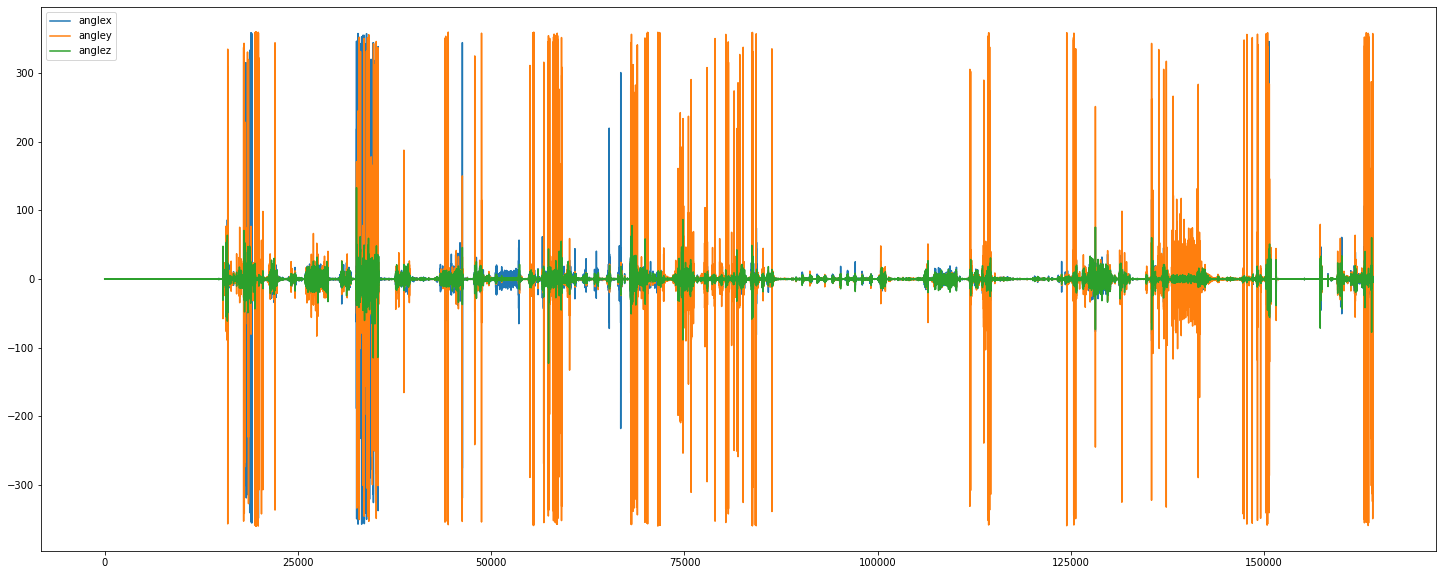

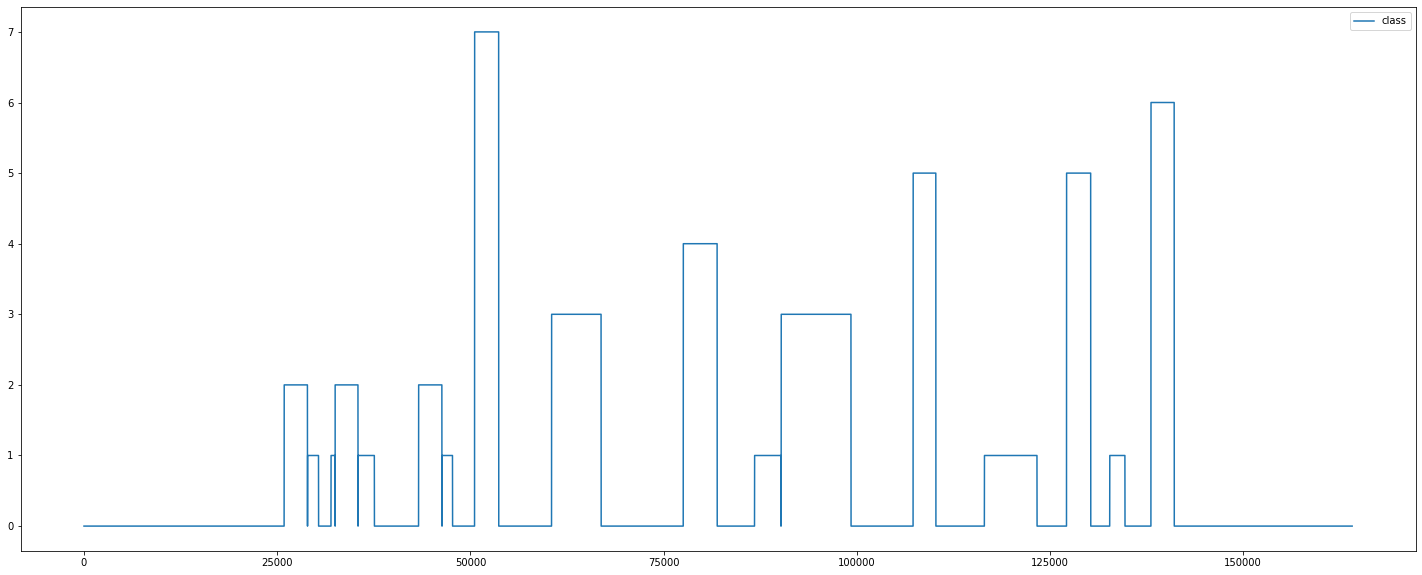

In [15]:
df.set_index('Timestamp')[["Accelerometer X", "Accelerometer Y", "Accelerometer Z"]].plot(figsize=(25,10))
df.set_index('Timestamp')[["Gyroscope X", "Gyroscope Y", "Gyroscope Z"]].plot(figsize=(25,10))
x1[['class']].plot(figsize=(25,10))

## Extract Features

In [36]:
cfg_file = tsfel.get_features_by_domain() 
x_sig_train = tsfel.time_series_features_extractor(cfg_file, x1, fs=100, window_size=100)  # Receives a time series sampled at 100 Hz, divides into windows of size 100 (i.e. 1 second) and extracts all features

*** Feature extraction started ***



*** Feature extraction finished ***


In [ ]:
x_sig_train.columns = [x.strip().replace('0_', 'accx') for x in x_sig_train.columns]
x_sig_train.columns = [x.strip().replace('1_', 'accy') for x in x_sig_train.columns]
x_sig_train.columns = [x.strip().replace('2_', 'accz') for x in x_sig_train.columns]
x_sig_train.columns = [x.strip().replace('3_', 'gyrox') for x in x_sig_train.columns]
x_sig_train.columns = [x.strip().replace('4_', 'gyroy') for x in x_sig_train.columns]
x_sig_train.columns = [x.strip().replace('5_', 'gyroz') for x in x_sig_train.columns]
x_sig_train.columns = [x.strip().replace('6_', 'class') for x in x_sig_train.columns]
x_sig_train

## Enter Save Path

In [ ]:
save_path = "FILEPATH.csv"

#enter full file path with .csv at the end
#use forward slashes here

## Save Features

In [37]:
x_sig_train.to_csv(save_path) 

#saving features to csv file